In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
from datetime import date
from tqdm import tqdm_notebook
from tqdm import tqdm
tqdm_notebook().pandas()

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

A Jupyter Widget

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
samp = pd.read_csv('sample.csv')

In [3]:
for c in tqdm(['city', 'mcc', 'atm_address', 'pos_address', 'transaction_date', 'terminal_id', 'currency']):
    test[c] = test[c].apply(lambda x: str(x).lower())
    
for c in tqdm(['city', 'mcc', 'atm_address', 'pos_address', 'transaction_date', 'terminal_id', 'currency']):
    train[c] = train[c].apply(lambda x: str(x).lower())

train.mcc = train.mcc.apply(lambda x: x.replace(',', ''))
test.mcc = test.mcc.apply(lambda x: x.replace(',', ''))

train.transaction_date = pd.to_datetime(train.transaction_date)
test.transaction_date = pd.to_datetime(test.transaction_date)
train['dow'] = train.transaction_date.dt.dayofweek
test['dow'] = test.transaction_date.dt.dayofweek
train.transaction_date = train.transaction_date.dt.date
test.transaction_date = test.transaction_date.dt.date

train['hol'] = train.dow.apply(lambda x: int(x>4))
test['hol'] = test.dow.apply(lambda x: int(x>4))

dt = date(2017, 1, 1)
train['date_int'] = train.transaction_date - dt
test['date_int'] = test.transaction_date - dt
train['date_int'] =train['date_int'].apply(lambda x: x.days)
test['date_int'] =test['date_int'].apply(lambda x: x.days)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.13s/it]


In [4]:
train.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon,dow,hol,date_int
0,2.884034,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177,5.0,1,195.0
1,2.775633,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177,4.0,0,299.0
2,3.708368,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"pr.marshala zhukova,31st petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177,1.0,0,275.0
3,2.787498,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177,5.0,1,251.0
4,2.892510,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177,3.0,0,186.0


In [16]:
uniq_cust = train.customer_id.unique()

In [17]:
lat_std = train[~train.home_add_lat.isnull()].groupby('customer_id').pos_adress_lat.std().to_dict()
lon_std = train[~train.home_add_lat.isnull()].groupby('customer_id').pos_adress_lon.std().to_dict()

In [18]:
df = pd.DataFrame({'customer_id':uniq_cust})

In [19]:
df['lat_std'] = df.customer_id.map(lat_std)
df['lon_std'] = df.customer_id.map(lon_std)
df['std'] = np.sqrt(df.lat_std**2 + df.lon_std**2)

In [21]:
sorted(set(train.mcc.unique()).union(set(test.mcc.unique())))

['146',
 '1520',
 '160',
 '165',
 '168',
 '169',
 '1711',
 '1731',
 '1740',
 '1750',
 '176',
 '1761',
 '1799',
 '183',
 '186',
 '194',
 '195',
 '200',
 '209',
 '215',
 '217',
 '223',
 '224',
 '227',
 '235',
 '236',
 '237',
 '243',
 '248',
 '260',
 '268',
 '272',
 '2741',
 '279',
 '2842',
 '294',
 '296',
 '297',
 '3011',
 '3026',
 '304',
 '3047',
 '305',
 '320',
 '324',
 '330',
 '332',
 '3351',
 '337',
 '3501',
 '3503',
 '3504',
 '3509',
 '3512',
 '3530',
 '3533',
 '3543',
 '3553',
 '3579',
 '3586',
 '3604',
 '3616',
 '3634',
 '3640',
 '3642',
 '3649',
 '3665',
 '3690',
 '3692',
 '3710',
 '3750',
 '3778',
 '388',
 '400',
 '4111',
 '4112',
 '4119',
 '4121',
 '4131',
 '4214',
 '4215',
 '4225',
 '4411',
 '4457',
 '4511',
 '458',
 '4582',
 '4722',
 '4784',
 '4789',
 '4812',
 '4814',
 '4816',
 '4899',
 '4900',
 '50',
 '5013',
 '5021',
 '5039',
 '5044',
 '5045',
 '5046',
 '5047',
 '5051',
 '5065',
 '5072',
 '5074',
 '5085',
 '5094',
 '5099',
 '5111',
 '5122',
 '5131',
 '5137',
 '5139',
 '5169

In [ ]:
mcc_desc = {'5261':'Садовые принадлежности (в том числе для ухода за газонами) в розницу',
            '5992':'Флористика',
            '5411':'Бакалейные магазины, супермаркеты',
            '5814':'Фастфуд', 
            '5812':'Места общественного питания, рестораны', 
            '5813':'Бары, коктейль-бары, дискотеки, ночные клубы и таверны – места продажи алкогольных напитков',
            '5499':'Различные продовольственные магазины - нигде более не классифицированные',
            '1520':'Генеральные подрядчики – жилое и коммерческое строительство',
            '1711':'Генеральные подрядчики по вентиляции, теплоснабжению и водопроводу',
            '1731':'Подрядчики по электричеству',
            }

In [6]:
pos_df = train[['customer_id', 'pos_adress_lat', 'pos_adress_lon', 'mcc', 'dow', 'hol', 'terminal_id', 'transaction_date']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
atm_df = train[['customer_id', 'atm_address_lat', 'atm_address_lon', 'mcc', 'dow', 'hol', 'terminal_id', 'transaction_date']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})

In [7]:
data = pd.concat([pos_df, atm_df], axis=0)
data.dropna(inplace=True)

In [3]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

[59.832 30.391] [59.846 30.39 ]
(13, 9)
13 0


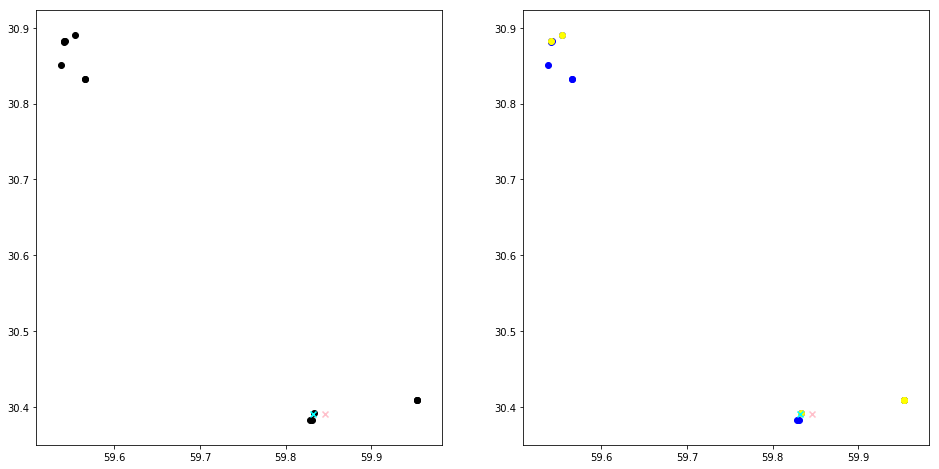

In [98]:
uniq_cust = train.customer_id.unique()
s = np.random.choice(uniq_cust, size=1)[0]
# s = '455564b15a4fea65f12caf304b1b2571'
temp = data[(data.customer_id == s)]
home = train[train.customer_id == s][['home_add_lat', 'home_add_lon']].values[0]
work = train[train.customer_id == s][['work_add_lat', 'work_add_lon']].values[0]
print(home, work)
# eps = 
# min_samp = b

clf = DBSCAN(eps = 0.02, p=2, min_samples=5)
temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)
print(temp.shape)

print(temp.shape[0], temp.out.max()+1)
plt.figure(figsize=(16,8))
colors = ['blue', 'green', 'red', 'violet', 'orange', 'brown', 'grey', 'yellow', 'magenta', 'cyan', 'pink', 'silver', 'gold']
plt.subplot(1,2,1)
plt.scatter(temp[temp.out == -1].lat, temp[temp.out == -1].lon, c='black')
for c in range(temp.out.max()+1):
    plt.scatter(temp[temp.out == c].lat, temp[temp.out == c].lon, c=colors[c])
    
for c in range(temp.out.max()+1):
    print(colors[c])
    print(temp[(temp.out == c) & (temp.hol == 0)].shape[0],temp[(temp.out == c) & (temp.hol == 1)].shape[0], temp[temp.out == c].terminal_id.nunique(), list(temp[temp.out == c].mcc.value_counts()[:5].index))
plt.scatter(home[0], home[1], c='cyan', marker='x')
plt.scatter(work[0], work[1], c='pink', marker='x')


plt.subplot(1,2,2)

plt.scatter(temp.lat, temp.lon, c='blue' )
plt.scatter(temp[temp.mcc == '5411'].lat, temp[temp.mcc == '5411'].lon, c='yellow' )
# plt.scatter(temp[temp.mcc == '5814'].lat, temp[temp.mcc == '5814'].lon, c='yellow' )

# plt.scatter(temp[temp.out == -1].lat, temp[temp.out == -1].lon, c='black')
# for c in range(temp.out.max()+1):
#     plt.scatter(temp[temp.out == c].lat, temp[temp.out == c].lon, c=colors[c])
plt.scatter(home[0], home[1], c='cyan', marker='x')
plt.scatter(work[0], work[1], c='pink', marker='x') 



In [202]:
clf.get_params()

{'algorithm': 'auto',
 'eps': 0.05,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': 1,
 'p': 2}

In [4]:
test.head(1)

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date
0,2.211818,nan,NaN,NaN,ivanteevka,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,5411,2-1 tolmacheva strivanteevka141280 rusrus,55.967487,37.913682,ff0476dae4b098a7b16aabe93d4268df,2017-08-24


In [76]:
# uniq_cust = test.customer_id.unique()
# os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation/customers')
# for u in tqdm_notebook(uniq_cust):
#     test[test.customer_id == u].to_csv(u+'.csv', index=False)

# uniq_cust = train.customer_id.unique()
# os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation/train_customers')
# for u in tqdm_notebook(uniq_cust):
#     train[train.customer_id == u].to_csv(u+'.csv', index=False)

A Jupyter Widget

A Jupyter Widget

In [377]:
samp.to_csv('bred2.csv', index=False)

In [375]:
test_val = pd.read_csv('full_xgb.csv')
clf = DBSCAN(eps = 0.02, p=2, min_samples=5)
h_lat = []
h_lon = []
w_lat = []
w_lon = []
qqq = 0
for u in tqdm_notebook(samp['customer_id'].values):
    temp = pd.read_csv('customers/' + u + '.csv')
    p = temp[['country','customer_id','pos_address_lat', 'pos_address_lon', 'hol']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})
    a = temp[['country','customer_id','atm_address_lat', 'atm_address_lon', 'hol']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
    d = pd.concat([p, a], axis=0)
    d.dropna(inplace=True)
    d = d[(d.country == 'RUS') | (d.country == 'RU ')]
    
    d['out'] = clf.fit_predict(d[['lat', 'lon']].values)
    
    temp = test_val[test_val.customer_id == u]
    if(temp.shape[0] > 0):
        w_cl = 0
        h_cl = 0
        hh = np.argmax(temp.pred_h1.values)
        ww = np.argmax(temp.pred_w1.values)
#         lat_h = temp.cl_lat_med.values[hh]
#         lon_h = temp.cl_lon_med.values[hh]
#         lat_w = temp.cl_lat_med.values[ww]
#         lon_w = temp.cl_lon_med.values[ww]
#         for cl in range(d.out.max()+1):
#             tt = d[d.out == cl]
#             if((tt.lat.median() == lat_h) & (tt.lon.median() == lon_h)):
#                 h_cl = cl
#                 qqq +=1
#                 break
#         for cl in range(d.out.max()+1):
#             tt = d[d.out == cl]
#             if((tt.lat.median() == lat_w) & (tt.lon.median() == lon_w)):
#                 w_cl = cl
#                 break
        
        lat_h = d[d.out == hh].lat.mean()
        lon_h = d[d.out == hh].lon.mean()
        lat_w = d[d.out == ww].lat.mean()
        lon_w = d[d.out == ww].lon.mean()
        
        h_lat.append((temp.cl_lat_med.values[hh] + lat_h)/2)
        h_lon.append((temp.cl_lon_med.values[hh] + lon_h)/2)
        w_lat.append((temp.cl_lat_med.values[ww] + lat_w)/2)
        w_lon.append((temp.cl_lon_med.values[ww] + lon_w)/2)
    else:
        temp = pd.read_csv('customers/' + u + '.csv')
        p = temp[['customer_id','pos_address_lat', 'pos_address_lon', 'hol']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})
        a = temp[['customer_id','atm_address_lat', 'atm_address_lon', 'hol']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
        d = pd.concat([p, a], axis=0)
        d.dropna(inplace=True)
        lat = np.median(d.lat.values)
        lon = np.median(d.lon.values)
        h_lat.append(lat)
        h_lon.append(lon)
        w_lat.append(lat)
        w_lon.append(lon)
        
    
samp['home_add_lat'] = h_lat
samp['home_add_lon'] = h_lon
samp['work_add_lat'] = w_lat
samp['work_add_lon'] = w_lon
 

A Jupyter Widget

In [236]:
s = pd.read_csv('first_cluster.csv')

In [238]:
samp.home_add_lat = s['_HOME_LAT_']
samp.home_add_lon = s['_HOME_LON_']

In [376]:
# samp.fillna(0, inplace=True)
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 5 columns):
customer_id     9997 non-null object
work_add_lat    9997 non-null float64
work_add_lon    9997 non-null float64
home_add_lat    9997 non-null float64
home_add_lon    9997 non-null float64
dtypes: float64(4), object(1)
memory usage: 390.6+ KB


In [461]:
samp.to_csv('with_alpha.csv', index=False)

In [14]:
samp.fillna(0, inplace=True)
samp.to_csv('first_cluster.csv', index=False)

In [15]:
sub = pd.read_csv('first_cluster.csv')

In [16]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 5 columns):
_ID_          9997 non-null object
_HOME_LAT_    9997 non-null float64
_HOME_LON_    9997 non-null float64
_WORK_LAT_    9997 non-null float64
_WORK_LON_    9997 non-null float64
dtypes: float64(4), object(1)
memory usage: 390.6+ KB


In [11]:
uniq_cust = train.customer_id.unique()
cust = np.random.choice(uniq_cust, size=9000)
eps = [0.02, 0.025, 0.03, 0.035, 0.04, 0.05]
num = [3, 4, 5]

d_near = {}
d_num = {}
for n in num:
    for e in eps:
        d_near[str(n)+'_'+str(e)] = []
        d_num[str(n)+'_'+str(e)] = []
        
for s in tqdm(cust):
    temp = pd.read_csv('train_customers/' + s + '.csv')
    p = temp[['customer_id','pos_adress_lat', 'pos_adress_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
    a = temp[['customer_id','atm_address_lat', 'atm_address_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
    temp = pd.concat([p, a], axis=0)
    temp.dropna(inplace=True)
    
    home = train[train.customer_id == s][['home_add_lat', 'home_add_lon']].values[0]
    work = train[train.customer_id == s][['work_add_lat', 'work_add_lon']].values[0]
    for n in num:
        for e in eps:
            clf = DBSCAN(eps = e, p=2, min_samples=n)
            temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)

            d_num[str(n)+'_'+str(e)].append(temp.out.max()+1)
            centers = np.zeros((temp.out.max()+1, 2))
            for c in range(temp.out.max()+1):
                centers[c][0] = temp[temp.out == c].lat.mean()
                centers[c][1] = temp[temp.out == c].lon.mean()

            if(home[0] > 0):
                h = []
                for line in centers:
                    h.append(np.sqrt((home[0] - line[0])**2 + (home[1] - line[1])**2))
                if(len(h) > 0):
                    d_near[str(n)+'_'+str(e)].append(min(h))

            if(work[0] > 0):
                w = []
                for line in centers:
                    w.append(np.sqrt((work[0] - line[0])**2 + (work[1] - line[1])**2))
                if(len(w) > 0):
                    d_near[str(n)+'_'+str(e)].append(min(w))

np.save('dict_near.npy', d_near) 
np.save('dict_num.npy', d_num) 

100%|██████████| 9000/9000 [2:13:13<00:00,  1.13it/s]  


In [22]:
d_near = np.load('dict_near.npy').item()
d_num = np.load('dict_num.npy').item()

In [21]:
# for k in d_near.keys():
#     print(k, np.mean(d_near[k]))

In [22]:
# for k in d_num.keys():
#     print(k, np.mean(d_num[k]))

In [165]:
cols = ['num','d1','d2','d3','d4','d5','d6','d7','term','mcc_num','is_hol','lat_std','lon_std','std','num_cl','lat_med','lon_med',\
        'amount','amount_2','amount_p1','amount_p2','amount_p3',\
        'date_long', 'date_med', 'date_std', 'date_win', 'date_spr', 'date_sum', 'date_aut']
l = []
for i in mcc_list:
    l.append(i+'_num')
    l.append(i+'_hol')
cols = cols + l  
l = ['cl_lat_std','cl_lon_std','cl_std','cl_num','cl_lat_med','cl_lon_med','cl_is_hol',\
        'cl_amount', 'cl_amount_2', 'cl_amount_p1','cl_amount_p2','cl_amount_p3','cl_date_max',\
        'cl_date_long', 'cl_date_med', 'cl_date_std', 'cl_date_win', 'cl_date_spr', 'cl_date_sum', 'cl_date_aut',\
    'num_002', 'num_005'] 
cols = cols + l 
l = []
for i in mcc_list:
    l.append(i+'_cl_num')
    l.append(i+'_cl_hol')
    l.append(i+'_date_std')
    l.append(i+'_date_med')  
    l.append(i+'_002')
    l.append(i+'_005') 
    l.append(i+'_y')  
cols = cols + l 
l = ['pos','mcc_1','mcc_2','mcc_3','mcc_4','mcc_5','mcc_6','mcc_7','mcc_8','mcc_9','mcc_10',\
        'n_1','n_2','n_3','n_4','n_5','n_6','n_7','n_8','n_9','n_10','customer_id']
cols = cols + l 

In [292]:
train

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon,dow,hol,date_int
0,2.884034,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177,5.0,1,195.0
1,2.775633,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177,4.0,0,299.0
2,3.708368,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"pr.marshala zhukova,31st petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177,1.0,0,275.0
3,2.787498,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177,5.0,1,251.0
4,2.892510,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177,3.0,0,186.0
5,2.909018,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177,2.0,0,234.0
6,2.801228,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177,5.0,1,209.0
7,2.838200,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177,5.0,1,195.0
8,3.264740,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,bcb3d58edc38eefade93d916db39b25f,2017-08-18,59.847,30.177,4.0,0,229.0
9,3.118792,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,nan,59.844072,30.179153,7fa36740d3d66ed86f69f5b3578de264,2017-05-13,59.847,30.177,5.0,1,132.0


In [295]:
ddd = {}
ddd['products'] = [5411, 5499]
ddd['meal'] = [5812, 5814]
ddd['bank'] = [6011, 6010]
ddd['apteka'] = [5912]
ddd['hotel'] = [7011]
ddd['parking'] = [7523]
ddd['alhogol'] = [5921]
ddd['car'] = [5541, 5533]
ddd['univermag'] = [5311, 5999, 5331]
ddd['entertainment'] = [7832, 7932, 7933]
ddd['sport'] = [5941]
ddd['hair'] = [7230]
ddd['cosm'] = [5977]
ddd['clothes'] = [5699, 5651, 5661, 5641]
ddd['child_clo'] = [5641]
ddd['zoomag'] = [5995]
mcc_list = ['products', 'meal', 'bank', 'apteka', 'hotel', 'parking', 'alhogol', 'car', 'univermag',\
            'entertainment', 'sport', 'hair', 'cosm', 'clothes', 'child_clo', 'zoomag']

os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation')
uniq_cust = train.customer_id.unique()
mccs = sorted(list(set(train.mcc.unique()).union(set(test.mcc.unique()))))
clf = DBSCAN(eps = 0.02, p=2, min_samples=5)
data = np.zeros((50000, 216))
users = []
for_work = []
position = []
it = -1

for u in tqdm_notebook(uniq_cust):
    temp = pd.read_csv('train_customers/' + u + '.csv')
    p = temp[['country','date_int','customer_id','pos_adress_lat', 'pos_adress_lon', 'terminal_id', 'amount', 'mcc', 'dow', 'hol', 'work_add_lat', 'work_add_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
    a = temp[['country','date_int','customer_id','atm_address_lat', 'atm_address_lon', 'terminal_id','amount', 'mcc', 'dow', 'hol', 'work_add_lat', 'work_add_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
    temp = pd.concat([p, a], axis=0)
    temp.dropna(inplace=True)
    temp = temp[(temp.country == 'RUS') | (temp.country == 'RU ')]
    
    if(temp.shape[0] > 0):
        temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)
        home = [max(temp['work_add_lat'].values), max(temp['work_add_lon'].values)]
#         home = [1]

        if(home[0] > 0):
#             glob = []
#             glob.append(temp.shape[0])
#             for i in range(7):
#                 glob.append(temp[temp.dow == i].shape[0])
#             glob.append(temp.terminal_id.nunique())
#             glob.append(temp.mcc.nunique())
#             lat_std = temp.lat.std()
#             lon_std = temp.lon.std()
#             glob.append(temp[temp.hol == 1].shape[0])
#             glob.append(lat_std)
#             glob.append(lon_std)
#             glob.append(np.sqrt((lat_std)**2 + (lon_std)**2))
#             glob.append(temp.out.max()+1)
#             glob.append(temp.lat.median())
#             glob.append(temp.lon.median())
#             glob.append(temp.amount.mean())
#             glob.append(temp.amount.median())
#             glob.append(temp[temp.amount <=2].shape[0])
#             glob.append(temp[(temp.amount >2) & (temp.amount <3.5)].shape[0])
#             glob.append(temp[temp.amount >=3.5].shape[0])
#             glob.append(temp.date_int.max()- temp.date_int.min())
#             glob.append(np.median(temp.date_int))
#             glob.append(temp.date_int.std())
#             glob.append(temp[(temp.date_int <= 60) | (temp.date_int>330)].shape[0])
#             glob.append(temp[(temp.date_int > 60) & (temp.date_int<=150)].shape[0])
#             glob.append(temp[(temp.date_int > 150) & (temp.date_int<=240)].shape[0])
#             glob.append(temp[(temp.date_int > 240) & (temp.date_int<=330)].shape[0])
            
#             for m in mcc_list:
#                 glob.append(sum([i in ddd[m] for i in temp.mcc]))
#                 temp4 = temp.iloc[[i in ddd[m] for i in temp.mcc]]
#                 glob.append(temp4[temp4.hol == 1].shape[0])

            
            q = pd.DataFrame(temp[temp.out >= 0].groupby('out', as_index=False).mcc.count()).sort_values(by='mcc', ascending=False)
            pl = range(1, q.shape[0]+1)
            q['p'] = pl

            for cl in range(temp.out.max()+1):
                it +=1
#                 loc = []
                users.append(u)
                temp2 = temp[temp.out == cl]
#                 lat_std = temp2.lat.std()
#                 lon_std = temp2.lon.std()
#                 loc.append(lat_std)
#                 loc.append(lon_std)
#                 loc.append(np.sqrt((lat_std)**2 + (lon_std)**2))
#                 loc.append(temp2.shape[0])
                lat_med = temp2.lat.median()
                lon_med = temp2.lon.median()
#                 loc.append(lat_med)
#                 loc.append(lon_med)
#                 loc.append(temp2[temp2.hol == 1].shape[0])
#                 loc.append(temp2.amount.mean())
#                 loc.append(temp2.amount.median())
#                 loc.append(temp2[temp2.amount <=2].shape[0])
#                 loc.append(temp2[(temp2.amount >2) & (temp2.amount <3.5)].shape[0])
#                 loc.append(temp2[temp2.amount >=3.5].shape[0])
#                 loc.append(temp2.date_int.max())
#                 loc.append(temp2.date_int.max()- temp2.date_int.min())
#                 loc.append(np.median(temp2.date_int))
#                 loc.append(temp2.date_int.std())
#                 loc.append(temp2[(temp2.date_int <= 60) | (temp2.date_int>330)].shape[0])
#                 loc.append(temp2[(temp2.date_int > 60) & (temp2.date_int<=150)].shape[0])
#                 loc.append(temp2[(temp2.date_int > 150) & (temp2.date_int<=240)].shape[0])
#                 loc.append(temp2[(temp2.date_int > 240) & (temp2.date_int<=330)].shape[0])
#                 temp['y'] = np.sqrt((temp.lat - lat_med)**2 + (temp.lon - lon_med)**2)
#                 loc.append(temp[temp.y <= 0.02].shape[0])
#                 loc.append(temp[temp.y <= 0.05].shape[0])
                
#                 for m in mcc_list:
#                     loc.append(sum([i in ddd[m] for i in temp2.mcc]))
#                     temp3 = temp2.iloc[[i in ddd[m] for i in temp2.mcc]]
#                     loc.append(temp3[temp3.hol == 1].shape[0])
#                     loc.append(temp3.date_int.std())
#                     loc.append(np.median(temp3.date_int))
                    
#                     temp5 = temp.iloc[[i in ddd[m] for i in temp.mcc]]
#                     loc.append(temp5[temp5.y <= 0.02].shape[0])
#                     loc.append(temp5[temp5.y <= 0.05].shape[0])
                    
#                     mcc_lat = temp.iloc[[i in ddd[m] for i in temp.mcc]].lat.median()
#                     mcc_lon = temp.iloc[[i in ddd[m] for i in temp.mcc]].lon.median()
#                     loc.append(np.sqrt((lat_med - mcc_lat)**2 + (lon_med - mcc_lon)**2))
                    
                
#                 loc.append(q[q.out == cl].p.values[0])
                position.append(q[q.out == cl].p.values[0])

#                 l = list(temp2.mcc.value_counts().index)
#                 l.extend(np.zeros(10))
#                 loc.extend(l[:10])
#                 l = list(temp2.mcc.value_counts())
#                 l.extend(np.zeros(10))
#                 loc.extend(l[:10])

#                 loc = glob + loc

#                 loc.append(np.sqrt((home[0] - lat_med)**2 + (home[1] - lon_med)**2))
                for_work.append(np.sqrt((home[0] - lat_med)**2 + (home[1] - lon_med)**2))
#                 data[it] = loc


A Jupyter Widget

In [298]:
df = pd.DataFrame({'customer_id':users, 'pos':position, 'y_work':for_work})
# len(users), len(position), len(for_work)

In [301]:
train_val_work = pd.merge(train_val, df, how='inner', on=['customer_id', 'pos'])

In [303]:
yyy = train_val_work.groupby('customer_id').y_work.min().to_dict()
train_val_work['nearest'] = train_val_work.customer_id.map(yyy)
train_val_work['nearest'] = list(train_val_work['nearest'] == train_val_work['y_work'])
train_val_work['nearest'] = train_val_work['nearest'].apply(lambda x: int(x))

In [305]:
train_val_work.to_csv('train_validation_work_full.csv', index=False)

In [154]:
# os.chdir('/home/lenny/Documents/Python Scripts/Raiff/train_set')
# df = pd.DataFrame(data[:len(users)])
# df['customer_id'] = users
# df.to_csv('test_validation_full.csv', index=False)


In [164]:
tr = pd.read_csv('test_validation_full.csv')

In [169]:
tr.to_csv('test_validation_full1.csv', index=False)

In [168]:
tr['dd'] = tr['d1']+tr['d2'] +tr['d3'] +tr['d4'] +tr['d5'] +tr['d6'] +tr['d7']
tr['d1'] = tr['d1'] / tr['dd']
tr['d2'] = tr['d2'] / tr['dd']
tr['d3'] = tr['d3'] / tr['dd']
tr['d4'] = tr['d4'] / tr['dd']
tr['d5'] = tr['d5'] / tr['dd']
tr['d6'] = tr['d6'] / tr['dd']
tr['d7'] = tr['d7'] / tr['dd']
tr['term'] = tr['term'] / tr['num']
tr['mcc_num'] = tr['mcc_num'] / tr['num']
tr['is_hol'] = tr['is_hol'] / tr['num']
tr['amount_p1'] = tr['amount_p1'] / tr['num']
tr['amount_p2'] = tr['amount_p2'] / tr['num']
tr['amount_p3'] = tr['amount_p3'] / tr['num']
tr['date_win'] = tr['date_win'] / tr['num']
tr['date_spr'] = tr['date_spr'] / tr['num']
tr['date_sum'] = tr['date_sum'] / tr['num']
tr['date_aut'] = tr['date_aut'] / tr['num']
for i in mcc_list:
    tr[i+'_num'] = tr[i+'_num'] / tr['num']
    tr[i+'_hol'] = tr[i+'_hol'] / tr['num']

tr['cl_is_hol'] = tr['cl_is_hol'] / tr['cl_num']
tr['cl_amount_p1'] = tr['cl_amount_p1'] / tr['cl_num']
tr['cl_amount_p2'] = tr['cl_amount_p2'] / tr['cl_num']
tr['cl_amount_p3'] = tr['cl_amount_p3'] / tr['cl_num']
tr['cl_date_win'] = tr['cl_date_win'] / tr['cl_num']
tr['cl_date_spr'] = tr['cl_date_spr'] / tr['cl_num']
tr['cl_date_sum'] = tr['cl_date_sum'] / tr['cl_num']
tr['cl_date_aut'] = tr['cl_date_aut'] / tr['cl_num']
tr['num_002'] = tr['num_002'] / tr['num']
tr['num_005'] = tr['num_005'] / tr['num']
for i in mcc_list:
    tr[i+'_cl_hol'] = tr[i+'_cl_hol'] / tr[i+'_cl_num']  
    tr[i+'_cl_num'] = tr['cl_num']
    tr[i+'_002'] = tr[i+'_002']
    tr[i+'_005'] = tr[i+'_005'] 
    
tr['nn'] = tr['n_1']+tr['n_2']+tr['n_3']+tr['n_4']+tr['n_5']+tr['n_6']+tr['n_7']+tr['n_8']+tr['n_9']+tr['n_10']
tr['n_1'] = tr['n_1'] / tr['nn']
tr['n_2'] = tr['n_2'] / tr['nn']
tr['n_3'] = tr['n_3'] / tr['nn']
tr['n_4'] = tr['n_4'] / tr['nn']
tr['n_5'] = tr['n_5'] / tr['nn']
tr['n_6'] = tr['n_6'] / tr['nn']
tr['n_7'] = tr['n_7'] / tr['nn']
tr['n_8'] = tr['n_8'] / tr['nn']
tr['n_9'] = tr['n_9'] / tr['nn']
tr['n_10'] = tr['n_10'] / tr['nn']
tr['mcc_1'] = tr['mcc_1'].apply(lambda x: str(int(x)))
tr['mcc_2'] = tr['mcc_2'].apply(lambda x: str(int(x)))
tr['mcc_3'] = tr['mcc_3'].apply(lambda x: str(int(x)))
tr['mcc_4'] = tr['mcc_4'].apply(lambda x: str(int(x)))
tr['mcc_5'] = tr['mcc_5'].apply(lambda x: str(int(x)))
tr['mcc_6'] = tr['mcc_6'].apply(lambda x: str(int(x)))
tr['mcc_7'] = tr['mcc_7'].apply(lambda x: str(int(x)))
tr['mcc_8'] = tr['mcc_8'].apply(lambda x: str(int(x)))
tr['mcc_9'] = tr['mcc_9'].apply(lambda x: str(int(x)))
tr['mcc_10'] = tr['mcc_10'].apply(lambda x: str(int(x)))
tr.drop(['nn', 'dd'], axis=1, inplace=True)

In [282]:
test_val = pd.read_csv('test_validation_full1.csv')
print(test_val.shape)
# test_val.fillna(-1, inplace=True)
# test_val.to_csv('test_validation_full1.csv', index=False)

(32770, 218)


In [109]:
train_val = pd.read_csv('train_validation_full1.csv')
train_val.shape
# train_val.fillna(-1, inplace=True)
# train_val.to_csv('train_validation_full1.csv', index=False)

(31659, 220)

In [341]:
train_val = pd.read_csv('train_validation_work_full.csv')
train_val.shape

(16783, 221)

In [16]:
# train_val = pd.merge(train_val[['customer_id', 'pos', 'pred_h0', 'pred_h1']], train_val_w, how='inner', on=['customer_id', 'pos'])   

In [279]:
# mmm = test_val.groupby('customer_id').cl_num.max().to_dict()
# yyy = train_val.groupby('customer_id').y.min().to_dict()
# test_val['naive'] = test_val['customer_id'].map(mmm)
# test_val['naive'] = list(test_val['cl_num'] == test_val['naive'])
# test_val['naive'] = test_val['naive'].apply(lambda x: int(x))
# train_val['nearest'] = train_val['customer_id'].map(yyy)
# train_val['nearest'] = list(train_val['y'] == train_val['nearest'])
# train_val['nearest'] = train_val['nearest'].apply(lambda x: int(x))

In [1]:
import xgboost as xgb
from sklearn.model_selection import KFold
cust = train.customer_id.unique()
skf = KFold(n_splits=5, shuffle=True, random_state=27)

params = {'eta':0.009, 
          'max_depth':7,
          'subsample':1,
          'colsample_bytree':0.8,
          'colsample_bylevel':0.8,
#           'tree_method':'gpu_hist',
          'objective':'binary:logistic',
          'scale_pos_weight':1,
          'min_child_weight':1,
          'nthread':4}

res = 0
for train_index, test_index in skf.split(cust):
    cust_tr = cust[train_index]
    cust_ts = cust[test_index]
    
    X_tr = train_val.iloc[[i in cust_tr for i in train_val.customer_id]]
    X_ts = train_val.iloc[[i in cust_ts for i in train_val.customer_id]]
    
    dtrain = xgb.DMatrix(X_tr.drop(['customer_id', 'y', 'nearest'], axis=1), X_tr.nearest)
    dtest = xgb.DMatrix(X_ts.drop(['customer_id', 'y', 'nearest'], axis=1))
    
    clf = xgb.train(params, dtrain, num_boost_round=900)
    preds = clf.predict(dtest)
    
    X_ts['preds'] = preds
    our = 0
    simp = 0
    for u in X_ts.customer_id.unique():
        temp = X_ts[X_ts.customer_id == u][['naive', 'nearest', 'preds']]
        pr = np.argmax(temp.preds.values)
        n = np.argmax(temp.naive.values)
        r = np.argmax(temp.nearest.values)
    
        if(pr == r): our +=1
        if(n == r): simp +=1
    res += our
    print(simp, our, X_ts.customer_id.nunique())
print(res)




NameError: name 'train' is not defined

In [128]:
X_ts.customer_id.nunique()

1964

In [325]:
cust = train_val.customer_id.unique()
val_cust = np.random.choice(cust, size=1500, replace=False)
tr_cust = list(set(cust).difference(set(val_cust)))

In [326]:
train_val['is_tr'] = train_val.customer_id.progress_apply(lambda x: 1 if x in tr_cust else 0)

A Jupyter Widget

In [327]:
X_tr = train_val[train_val.is_tr == 1]
X_ts = train_val[train_val.is_tr == 0]
print(X_tr.shape, X_ts.shape)
y_tr = X_tr.nearest
y_ts = X_ts.nearest
X_tr.drop(['is_tr', 'y', 'customer_id', 'nearest', 'y_work'],axis=1, inplace=True)
X_test = X_ts.drop(['is_tr', 'y', 'customer_id', 'nearest', 'y_work'], axis=1)

(11968, 222) (4815, 222)


In [107]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_predict

In [342]:
X_tr = train_val.drop(['y', 'customer_id', 'nearest', 'y_work'],axis=1)
y_tr = train_val['nearest']

In [344]:
rg = xgb.XGBClassifier(max_depth=7, n_estimators=900, learning_rate=0.009, objective='binary:logistic', n_jobs=-1, \
                 colsample_bytree=0.8, colsample_bylevel=0.8, random_state=27)

In [30]:
# score = cross_val_predict(rg, train_val.drop(['y', 'customer_id', 'nearest'],axis=1), \
#                           train_val['nearest'], cv=7, n_jobs=-1, method='predict_proba')

In [345]:
rg.fit(X_tr, y_tr, verbose=10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.009,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=900, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=27, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [348]:
preds = rg.predict_proba(test_val.drop(['customer_id', 'pred_h0', 'pred_h1'], axis=1))

In [353]:
test_val.to_csv('full_xgb.csv', index=False)

In [319]:
# test_val['pred_h1'] = preds[:,1]

In [340]:
X_ts['preds'] = preds[:,1]
our = 0
simp = 0
for u in tqdm_notebook(val_cust):
    temp = X_ts[X_ts.customer_id == u][['naive', 'nearest', 'preds']]
    pr = np.argmax(temp.preds.values)
    n = np.argmax(temp.naive.values)
    r = np.argmax(temp.nearest.values)

    if(pr == r): our +=1
    if(n == r): simp +=1
    
print(simp, our)

A Jupyter Widget


869 1060


In [95]:
# test_val

In [233]:
print(simp, our)

[960] [906]


In [439]:
clnum = train_val.groupby('customer_id').cl_num.max().to_dict()
mindist = train_val.groupby('customer_id').y.min().to_dict()
train_val['naive'] = train_val.customer_id.map(clnum)
train_val['nearest'] = train_val.customer_id.map(mindist)

In [96]:
# train_val.head()

In [267]:
train_val[(train_val.naive == 1) & (train_val.nearest == 1)]

(6396, 53)

In [269]:
train_val[(train_val.naive == 1) & (train_val.y < 0.02)].shape

(3677, 53)

In [97]:
# train.head(3)

In [424]:
pos = train[['customer_id', 'pos_adress_lat', 'pos_adress_lon', 'mcc', 'dow', 'hol', 'terminal_id', 'transaction_date', 'home_add_lat', 'home_add_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
atm = train[['customer_id', 'atm_address_lat', 'atm_address_lon', 'mcc', 'dow', 'hol', 'terminal_id', 'transaction_date', 'home_add_lat', 'home_add_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
data = pd.concat([pos, atm], axis=0)
data.dropna(inplace=True)


In [429]:
coord = data[['lat', 'lon']]
coord.drop_duplicates(inplace=True)
coord.shape

(120450, 2)

In [430]:
homes = data[['home_add_lat', 'home_add_lon']]
homes.drop_duplicates(inplace=True)
homes.shape

(10146, 2)

In [98]:
# train_val.head()

In [450]:
train_val = pd.read_csv('train_validation_work.csv')
clnum = train_val.groupby('customer_id').cl_num.max().to_dict()
train_val['maxx'] = train_val.customer_id.map(clnum)

In [9]:
# alphas = np.linspace(0.1, 0.6, 50)
# for al in alphas:
#     train_val['res'] = (1 - train_val['cl_is_hol']) + al*(train_val['cl_num']/train_val['maxx'])
#     maxres = train_val.groupby('customer_id').res.max().to_dict()
#     train_val['maxres'] = train_val.customer_id.map(maxres)
#     train_val['our'] = list(train_val['maxres'] == train_val['res'])
#     train_val['our'] = train_val['our'].apply(lambda x: int(x))
#     print(al, train_val[(train_val.nearest == 1) & (train_val.our == 1)].shape[0])
    

In [41]:
t = train[train.terminal_id == '7487298f8a95494300a28b4baa051f85'][['home_add_lat', 'home_add_lon', 'pos_adress_lat', 'pos_adress_lon']]
print(t.shape)
t.drop_duplicates(inplace=True)
t.shape

(621, 4)


(15, 4)

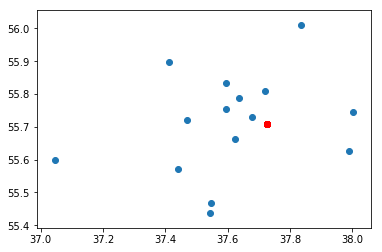

In [42]:
plt.scatter(t.home_add_lon, t.home_add_lat)
plt.scatter(t.pos_adress_lon, t.pos_adress_lat, c='red')

In [45]:
t = train.groupby('terminal_id').customer_id.nunique()

In [22]:
os.chdir('/Users/e.kononenko/Documents/Python Scripts/Raiff/test_validation')
uniq_cust = train.customer_id.unique()
eps = [0.017, 0.02, 0.025, 0.03]
num = [4,5]

for e in eps:
    for n in num:
        clf = DBSCAN(eps = e, p=2, min_samples=n)
        mmed = 0
        mmean = 0
        ssr = 0
        mmed_w = 0
        mmean_w = 0
        ssr_w = 0
        for u in tqdm_notebook(uniq_cust):
            temp = pd.read_csv('train_customers/' + u + '.csv')
            p = temp[['country','date_int','customer_id','pos_adress_lat', 'pos_adress_lon', 'terminal_id', 'amount', 'mcc', 'dow', 'hol', 'home_add_lat', 'home_add_lon', 'work_add_lat', 'work_add_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
            a = temp[['country','date_int','customer_id','atm_address_lat', 'atm_address_lon', 'terminal_id','amount', 'mcc', 'dow', 'hol', 'home_add_lat', 'home_add_lon', 'work_add_lat', 'work_add_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
            temp = pd.concat([p, a], axis=0)
            home = [max(p['home_add_lat'].values), max(p['home_add_lon'].values)]
            work = [max(p['work_add_lat'].values), max(p['work_add_lon'].values)]
            temp.drop(['work_add_lat', 'work_add_lon'], axis=1, inplace=True)
            temp.dropna(inplace=True)
            temp = temp[(temp.country == 'RUS') | (temp.country == 'RU ')]

            if(temp.shape[0] > 0):
                med = 0
                mean = 0
                sr =0
                med_w = 0
                mean_w = 0
                sr_w =0
                temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)
                
                if(home[0] > 0):
                    for cl in range(temp.out.max()+1):
                        temp2 = temp[temp.out == cl]
                        lat_med = temp2.lat.median()
                        lon_med = temp2.lon.median()
                        lat_mean = temp2.lat.mean()
                        lon_mean = temp2.lon.mean()

                        if(np.sqrt((home[0] - lat_med)**2 + (home[1] - lon_med)**2) <= 0.02):
                            med = 1
                        if(np.sqrt((home[0] - lat_mean)**2 + (home[1] - lon_mean)**2) <= 0.02):
                            mean = 1
                        if(np.sqrt((home[0] - (lat_mean + lat_med)/2)**2 + (home[1] - (lon_mean+lon_med)/2)**2) <= 0.02):
                            sr = 1   
                            
                if(work[0] > 0):
                    for cl in range(temp.out.max()+1):
                        temp2 = temp[temp.out == cl]
                        lat_med = temp2.lat.median()
                        lon_med = temp2.lon.median()
                        lat_mean = temp2.lat.mean()
                        lon_mean = temp2.lon.mean()

                        if(np.sqrt((work[0] - lat_med)**2 + (work[1] - lon_med)**2) <= 0.02):
                            med_w = 1
                        if(np.sqrt((work[0] - lat_mean)**2 + (work[1] - lon_mean)**2) <= 0.02):
                            mean_w = 1
                        if(np.sqrt((work[0] - (lat_mean + lat_med)/2)**2 + (work[1] - (lon_mean+lon_med)/2)**2) <= 0.02):
                            sr_w = 1 
                            
                mmed += med
                mmean += mean
                ssr += sr
                mmed_w += med_w
                mmean_w += mean_w
                ssr_w += sr_w
        print(e, n, mmed, mmean, ssr, mmed_w, mmean_w, ssr_w)


A Jupyter Widget

Exception in thread Thread-30:
Traceback (most recent call last):
  File "C:\Users\e.kononenko\AppData\Local\Continuum\anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\e.kononenko\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\e.kononenko\AppData\Local\Continuum\anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




0.017 4 5677 5749 5732 2183 2215 2200


A Jupyter Widget


0.017 5 5463 5529 5516 2076 2110 2091


A Jupyter Widget


0.02 4 5527 5610 5601 2111 2137 2136


A Jupyter Widget


0.02 5 5326 5408 5395 2015 2044 2040


A Jupyter Widget


0.025 4 5282 5323 5346 2000 2004 2015


A Jupyter Widget


0.025 5 5121 5159 5186 1934 1941 1949


A Jupyter Widget


0.03 4 5069 5040 5099 1919 1885 1923


A Jupyter Widget


0.03 5 4935 4919 4971 1868 1837 1871


In [8]:
os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation')
uniq_cust = train.customer_id.unique()
clf = DBSCAN(eps = 0.016, p=2, min_samples=3)
users = []
classes = []

for u in tqdm_notebook(uniq_cust):
    temp = pd.read_csv('train_customers/' + u + '.csv')
    p = temp[['country','date_int','customer_id','pos_adress_lat', 'pos_adress_lon', 'terminal_id', 'amount', 'mcc', 'dow', 'hol', 'home_add_lat', 'home_add_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
    a = temp[['country','date_int','customer_id','atm_address_lat', 'atm_address_lon', 'terminal_id','amount', 'mcc', 'dow', 'hol', 'home_add_lat', 'home_add_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
    temp = pd.concat([p, a], axis=0)
    temp.dropna(inplace=True)
    temp = temp[(temp.country == 'RUS') | (temp.country == 'RU ')]
    home = [max(temp['home_add_lat'].values), max(temp['home_add_lon'].values)]

    if(temp.shape[0] > 0):
        temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)
        for cl in range(temp.out.max()+1):
            temp2 = temp[temp.out == cl]
            lat_med = temp2.lat.median()
            lon_med = temp2.lon.median()
            if(np.sqrt((lat_med -home[0])**2 + (lon_med - home[1])**2) <= 0.035):
                users.append(u)
                classes.append(cl)



A Jupyter Widget

In [92]:
sum(temp[temp.out >= 0].groupby('out', as_index=False).y.min().sort_values(by='y').y <= 0.02)

1

In [9]:
adj = pd.DataFrame({"customer_id":users, 'class':classes})

In [10]:
os.chdir('/home/lenny/Documents/Python Scripts/Raiff/test_validation')
clf = DBSCAN(eps = 0.016, p=2, min_samples=3)
med = 0
mean = 0

ar = [0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0,0]
b=0

for line in tqdm_notebook(adj.values):
    temp = pd.read_csv('train_customers/' + line[1] + '.csv')
    p = temp[['country','date_int','customer_id','pos_adress_lat', 'pos_adress_lon', 'terminal_id', 'amount', 'mcc', 'dow', 'hol', 'home_add_lat', 'home_add_lon']].rename(columns={'pos_adress_lat':'lat', 'pos_adress_lon':'lon'})
    a = temp[['country','date_int','customer_id','atm_address_lat', 'atm_address_lon', 'terminal_id','amount', 'mcc', 'dow', 'hol', 'home_add_lat', 'home_add_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'})
    temp = pd.concat([p, a], axis=0)
    temp.dropna(inplace=True)
    temp = temp[(temp.country == 'RUS') | (temp.country == 'RU ')]
    home = [max(temp['home_add_lat'].values), max(temp['home_add_lon'].values)]

    if(temp.shape[0] > 0):
        temp['out'] = clf.fit_predict(temp[['lat', 'lon']].values)
        temp2 = temp[temp.out == line[0]]
        lat_med = temp2.lat.median()
        lon_med = temp2.lon.median()
        lat_mean = temp2.lat.mean()
        lon_mean = temp2.lon.mean()
        
        lat_step = lat_mean - lat_med
        lon_step = lon_mean - lon_med
#         s = np.sqrt((lat_step)**2 + (lon_step)**2)
#         if(s != 0):
#             lat_step = lat_step / s/1000
#             lon_step = lon_step / s/1000

        

        for e, i in enumerate([2, 1.8, 1.5,1.3, 1.2,1.1, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0]):
            if(np.sqrt((lat_med + (i*lat_step) -home[0])**2 + (lon_med + (i*lon_step) - home[1])**2) <= 0.02):
                ar[e] += 1
print(ar)
           

A Jupyter Widget


[6134, 6171, 6213, 6215, 6219, 6215, 6212, 6218, 6221, 6222, 6221, 6210, 6201, 6171, 0, 0, 0]


In [ ]:
# 5360 5434
# [5426, 5442, 5439, 5434, 5430, 5399, 0, 0, 0]

In [2]:
df = pd.read_csv('new_bred002.csv')

In [7]:
df.to_csv('new_bred002h.csv', index=False)

In [20]:
mcc_list = ['products', 'meal', 'bank', 'apteka', 'hotel', 'parking', 'alhogol', 'car', 'univermag',\
                'entertainment', 'sport', 'hair', 'cosm', 'clothes', 'child_clo', 'zoomag']

cols = ['num','d1','d2','d3','d4','d5','d6','d7','term','mcc_num','is_hol','lat_std','lon_std','std','num_cl','lat_med','lon_med',\
        'amount','amount_2','amount_p1','amount_p2','amount_p3','bank_amount', \
       'date_long', 'date_freq', 'date_med', 'date_std', 'date_win', 'date_spr', 'date_sum', 'date_aut']
l = []
for i in mcc_list:
    l.append(i+'_num')
    l.append(i+'_hol')
cols = cols + l 
l = ['cl_lat_std','cl_lon_std','cl_std','cl_num','cl_lat_med','cl_lon_med','cl_is_hol',\
        'cl_amount', 'cl_amount_2', 'cl_amount_p1','cl_amount_p2','cl_amount_p3','cl_date_max',\
        'cl_date_freq','cl_date_long', 'cl_date_med', 'cl_date_std', 'cl_date_win', 'cl_date_spr', 'cl_date_sum', \
     'cl_date_aut','num_002', 'num_0035', 'num_005', 'num_008','numh_002', 'numh_0035', 'numh_005', 'numh_008'] 
cols = cols + l 
l = []
for i in mcc_list:
    l.append(i+'_cl_num')
    l.append(i+'_cl_hol')
    l.append(i+'_date_std')
    l.append(i+'_date_med')  
    l.append(i+'_002')
    l.append(i+'_0035') 
    l.append(i+'_005')
    l.append(i+'_008')
    l.append(i+'_y')  
cols = cols + l 
l = ['pos','pos2','pos3']
cols = cols + l 
for m in ['products', 'meal', 'bank', 'apteka', 'univermag']:
    cols.append(m+'_near')
cols.append('y')
cols.append('customer_id')

In [25]:
train_val = pd.read_csv('train_dbscan4_0.014.csv')

In [26]:
train_val.head()

,num,d1,d2,d3,d4,d5,d6,d7,term,mcc_num,is_hol,lat_std,lon_std,std,num_cl,lat_med,lon_med,amount,amount_2,amount_p1,amount_p2,amount_p3,bank_amount,date_long,date_freq,date_med,date_std,date_win,date_spr,date_sum,date_aut,products_num,products_hol,meal_num,meal_hol,bank_num,bank_hol,apteka_num,apteka_hol,hotel_num,hotel_hol,parking_num,parking_hol,alhogol_num,alhogol_hol,car_num,car_hol,univermag_num,univermag_hol,entertainment_num,...,hair_008,hair_y,cosm_cl_num,cosm_cl_hol,cosm_date_std,cosm_date_med,cosm_002,cosm_0035,cosm_005,cosm_008,cosm_y,clothes_cl_num,clothes_cl_hol,clothes_date_std,clothes_date_med,clothes_002,clothes_0035,clothes_005,clothes_008,clothes_y,child_clo_cl_num,child_clo_cl_hol,child_clo_date_std,child_clo_date_med,child_clo_002,child_clo_0035,child_clo_005,child_clo_008,child_clo_y,zoomag_cl_num,zoomag_cl_hol,zoomag_date_std,zoomag_date_med,zoomag_002,zoomag_0035,zoomag_005,zoomag_008,zoomag_y,pos,pos2,pos3,products_near,meal_near,bank_near,apteka_near,univermag_near,y,customer_id,naive,nearest
0,70.0,7.0,11.0,9.0,12.0,13.0,12.0,6.0,17.0,4.0,18.0,0.026746,0.039420,0.047637,2.0,59.845500,30.180000,3.565942,3.597486,0.0,32.0,38.0,3.669941,305.0,4.357143,212.0,86.675421,6.0,15.0,24.0,25.0,1.0,0.0,0.0,0.0,59.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,2.0,2.0,0.000153,NaN,0.000806,NaN,NaN,0.053451,0dc0137d280a2a82d2dc89282450ff1b,1,0
1,70.0,7.0,11.0,9.0,12.0,13.0,12.0,6.0,17.0,4.0,18.0,0.026746,0.039420,0.047637,2.0,59.845500,30.180000,3.565942,3.597486,0.0,32.0,38.0,3.669941,305.0,4.357143,212.0,86.675421,6.0,15.0,24.0,25.0,1.0,0.0,0.0,0.0,59.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2.0,1.0,1.0,0.067518,NaN,0.068456,NaN,NaN,0.015264,0dc0137d280a2a82d2dc89282450ff1b,0,1
2,43.0,3.0,1.0,7.0,5.0,11.0,6.0,10.0,32.0,10.0,16.0,0.322618,1.108208,1.154213,4.0,54.985457,82.892559,2.261875,2.404893,13.0,30.0,0.0,2.976142,229.0,5.325581,166.0,42.197684,1.0,14.0,27.0,1.0,14.0,6.0,16.0,5.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,2.0,2.0,0.030839,0.000887,0.058803,1.660302,NaN,0.047570,0e4c72f1c28452fe3bab0283381b8afd,1,0
3,43.0,3.0,1.0,7.0,5.0,11.0,6.0,10.0,32.0,10.0,16.0,0.322618,1.108208,1.154213,4.0,54.985457,82.892559,2.261875,2.404893,13.0,30.0,0.0,2.976142,229.0,5.325581,166.0,42.197684,1.0,14.0,27.0,1.0,14.0,6.0,16.0,5.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2.0,1.0,1.0,0.070925,0.055544,0.008729,1.616330,NaN,0.082573,0e4c72f1c28452fe3bab0283381b8afd,0,0
4,43.0,3.0,1.0,7.0,5.0,11.0,6.0,10.0,32.0,10.0,16.0,0.322618,1.108208,1.154213,4.0,54.985457,82.892559,2.261875,2.404893,13.0,30.0,0.0,2.976142,229.0,5.325581,166.0,42.197684,1.0,14.0,27.0,1.0,14.0,6.0,16.0,5.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3.0,0.000000,0.031014,0.071342,1.685555,NaN,0.016752,0e4c72f1c28452fe3bab0283381b8afd,0,1


In [22]:
# naive = train_val.groupby('customer_id').cl_num.max().to_dict()
# train_val['naive'] = train_val.customer_id.map(naive)
# train_val['naive'] = list(train_val['naive'] == train_val['cl_num'])
# train_val['naive'] = train_val['naive'].apply(lambda x: int(x))
# train_val['nearest'] = train_val.y.apply(lambda x: 1 if x <= 0.02 else 0)

In [30]:
import xgboost as xgb
from sklearn.model_selection import KFold
cust = train.customer_id.unique()
skf = KFold(n_splits=5, shuffle=True, random_state=27)

params = {'eta':0.009, 
          'max_depth':7,
          'subsample':0.7,
          'colsample_bytree':0.8,
          'colsample_bylevel':0.8,
          'tree_method':'gpu_hist',
          'objective':'binary:logistic',
          'scale_pos_weight':1,
          'min_child_weight':1,
#           'gamma':0.1,
#           'alpha':0.1
#           'nthread':4
         }

res = 0
for train_index, test_index in skf.split(cust):
    cust_tr = cust[train_index]
    cust_ts = cust[test_index]
    
    X_tr = train_val.iloc[[i in cust_tr for i in train_val.customer_id]]
    X_ts = train_val.iloc[[i in cust_ts for i in train_val.customer_id]]
    
    dtrain = xgb.DMatrix(X_tr.drop(['customer_id', 'y', 'nearest'], axis=1), X_tr.nearest)
    dtest = xgb.DMatrix(X_ts.drop(['customer_id', 'y', 'nearest'], axis=1))
    
    clf = xgb.train(params, dtrain, num_boost_round=1400)
    preds = clf.predict(dtest)
    
    X_ts['preds'] = preds
    our = 0
    simp = 0
    for u in X_ts.customer_id.unique():
        temp = X_ts[X_ts.customer_id == u][['naive', 'nearest', 'preds']]
        pr = np.argmax(temp.preds.values)
        n = np.argmax(temp.naive.values)
    
        if(temp.nearest.values[pr] == 1): our +=1
        if(temp.nearest.values[n] == 1): simp +=1
    res += our
    print(simp, our, X_ts.customer_id.nunique())
print(res)
print(train_val[train_val.y <= 0.02].customer_id.nunique())

733 921 1977
754 925 1985
704 916 1982
720 936 1980
707 908 1983
4606
5784
